# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q2, and one of Q1 or Q3.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('./data/shark_attacks.xls')
df = df.iloc[:, :15] # deleting columns with no data
df['Year'] = pd.to_numeric(df['Year'], errors='coerce') # cleaning year
df = df[df['Year'].notna()]
df['Year'] = df['Year'].astype(int)
df = df[df['Year'] > 4]
df

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,2025-01-11 00:00:00,2025,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,Bitten on the arm,N,1340hrs,Not stated,Kevin McMurray Trackingsharks.com
1,2025-01-02 00:00:00,2025,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,Severe arm injury and delay in medical treatme...,Y,1615hr,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith
2,2025-01-02 00:00:00,2025,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,Body not recovered,Y,1710hr,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...
3,2024-12-29 00:00:00,2024,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69,Injuries to stomach preventing attack on friend,N,?,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...
4,2024-12-29 00:00:00,2024,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48,Entire calf muscle removed and bitten both arm...,Y,?,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6856,Ca 1588.04.00,1518,Unprovoked,MEXICO,Yucatan,Cozumel,Swmming,A cacique (a chief),M,NaN,Toes severed,N,NaN,NaN,"C. Moore, GSAF"
6857,Ca 1200-1500 A.D.,1500,Unprovoked,MEXICO,NaN,NaN,NaN,male,M,NaN,Foot severed,N,NaN,NaN,J. Castro
6858,Ca.789-1033 A.D,1000,Unprovoked,USA,Puerto Rico,Archeological site,NaN,male,M,29,FATAL,N,NaN,Tiger shark,P. Seigel
6859,Ca. 77 A.D.,77,Unprovoked,NaN,Ionian Sea,NaN,Sponge diving,males,M,NaN,FATAL,Y,NaN,NaN,Perils mentioned by Pliny the Elder (23 A.D. t...


Given the head and tails of data above, the range of years spans from 5 to 2025.

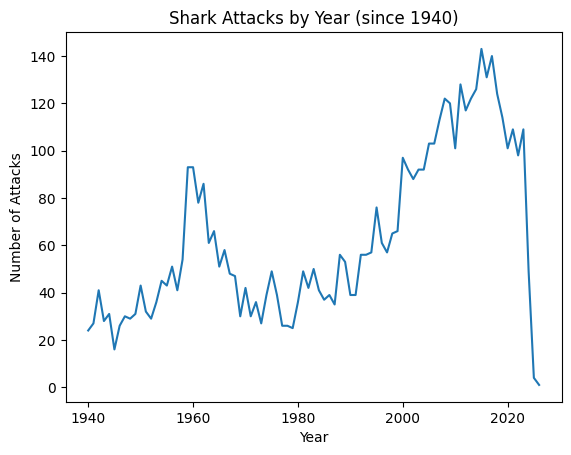

In [139]:
yearly_attacks = df[df['Year'] >= 1940].groupby('Year').size()
plt.plot(yearly_attacks.index, yearly_attacks.values)
plt.title('Shark Attacks by Year (since 1940)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

Using the data from the plot above, we can see that there has been an overall increase of shark attacks since 1940. There was a peak in the early 1960s that dropped down not long after. However, since 1990 there has been a steady increase.

/var/folders/sz/cdb9zr597xq7kdzbqnsgf72r0000gn/T/ipykernel_26842/1431352227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)


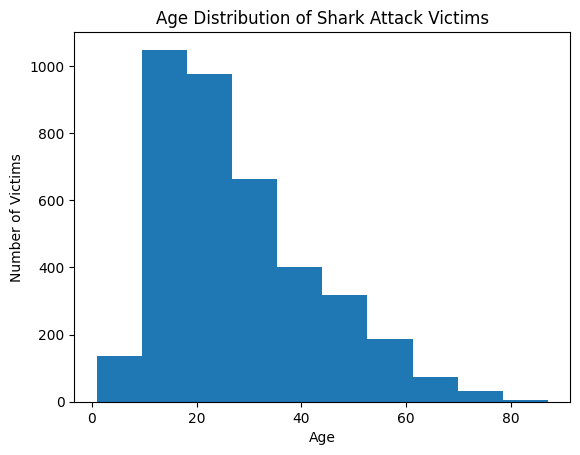

In [140]:
df = df[df['Age'].apply(lambda x: str(x).isdigit())]
df['Age'] = df['Age'].astype(int)
df.loc[:, 'Age'] = df['Age'].astype(int)
plt.hist(df['Age'])
plt.title('Age Distribution of Shark Attack Victims')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.show()

In [141]:
proportion = (df['Sex'].str.upper().str.strip() == 'M').mean()
print(f"Proportion of male victims: {proportion:.2%}")

Proportion of male victims: 84.50%


In [142]:
df.loc[:, 'Type'] = df['Type'].str.lower().str.strip()
df.loc[:, 'Type'] = df['Type'].apply(lambda x: 'Unprovoked' if 'unprovoked' in str(x) 
                                    else 'Provoked' if 'provoked' in str(x) 
                                    else 'Unknown')

unprovoked_proportion = (df['Type'] == 'Unprovoked').mean()
print(f"Proportion of unprovoked attacks: {unprovoked_proportion:.2%}")

Proportion of unprovoked attacks: 83.28%


In [143]:
df.loc[:, 'Fatal Y/N'] = df['Fatal Y/N'].str.upper().str.strip()
df.loc[:, 'Fatal Y/N'] = df['Fatal Y/N'].apply(lambda x: 'UNKNOWN' if 'UNKNOWN' in str(x) 
                                    else 'Y' if 'Y' in str(x)
                                    else 'N' if 'N' in str(x)
                                    else 'UNKNOWN')
df['Fatal Y/N'].unique()

array(['N', 'Y', 'UNKNOWN'], dtype=object)

In [144]:
provoked = df[df['Type'] == 'Provoked']
unprovoked = df[df['Type'] == 'Unprovoked']
m_attacks = df[df['Sex'] == 'M']
f_attacks = df[df['Sex'] == 'F']

male_proportion = (unprovoked['Sex'] == 'M').mean()
print(f"Proportion of unprovoked attacks on men: {male_proportion:.2%}")

female_proportion = (unprovoked['Sex'] == 'F').mean()
print(f"Proportion of unprovoked attacks on women: {female_proportion:.2%}")

fatalp_proportion = (provoked['Fatal Y/N'] == 'Y').mean()
print(f"Proportion of provoked attacks that are fatal: {fatalp_proportion:.2%}")

fatalu_proportion = (unprovoked['Fatal Y/N'] == 'Y').mean()
print(f"Proportion of unprovoked attacks that are fatal: {fatalu_proportion:.2%}")

fatalm_proportion = (m_attacks['Fatal Y/N'] == 'Y').mean()
print(f"Proportion of attacks on men that are fatal: {fatalm_proportion:.2%}")

fatalf_proportion = (f_attacks['Fatal Y/N'] == 'Y').mean()
print(f"Proportion of attacks on women that are fatal: {fatalf_proportion:.2%}")

Proportion of unprovoked attacks on men: 83.95%
Proportion of unprovoked attacks on women: 15.26%
Proportion of provoked attacks that are fatal: 2.63%
Proportion of unprovoked attacks that are fatal: 19.46%
Proportion of attacks on men that are fatal: 17.64%
Proportion of attacks on women that are fatal: 14.08%


Based on the proportions above...
- Men are more likely to be victims of unprovoked attacks.
- Unprovoked attacks are more likely to be fatal.
- Men are more likely to succumb to fatal attacks.
- I feel slightly more scared of sharks today than I did last week.

In [145]:
white_proportion = df.iloc[:, 13].str.lower().str.contains('white', na=False).mean()
print(f"Proportion of attacks from white sharks: {white_proportion:.2%}")

Proportion of attacks from white sharks: 12.74%


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?